In [67]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import lmfit as lm
import scipy.special as sf
from scipy.stats import norm

In [68]:
length = 1000000
density = 5
w = 1.0
ep = 1.0
# in optics we use exp(-2x**2/w**2) the corresponding sigma for a normal
# distribution is exp(-x**2/2/sigma**2)
# 2/w**2 = 1/2/sigma**2
# 2 sigma = w
sigma = w/2
L = 100
N = int(2*L*density)
L = N / 2 / density
print('N: ',N, 'sqrt(N): ',np.sqrt(N),'L: ',L)

N:  1000 sqrt(N):  31.622776601683793 L:  100.0


In [69]:
# testing over which range in L the particles have significant intensities
x = np.arange(-L,L+1)
intensity = ep*sigma*np.sqrt(2*np.pi)*norm.pdf(x, loc=0,scale=sigma)
#for i in range(len(x)):
#    print(x[i],intensity[i])

In [70]:
# generate positions for all particles
positions=2*L*np.random.random(size=(N,length))-L
# place a Gaussian illumination at x=0 with std = sigma
intensity = ep*sigma*np.sqrt(2*np.pi)*norm.pdf(positions, loc=0,scale=sigma)
#print(intensity)
intensity = np.sum(intensity, axis=0)

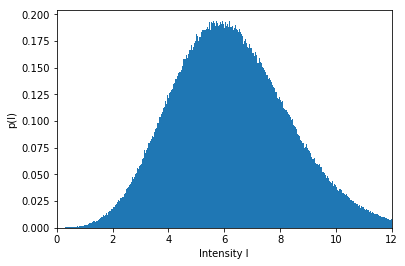

In [76]:
a=plt.hist(intensity,bins=500,density=True)
#plt.yscale('log')
#plt.ylim((1e-2,2))
plt.xlim((0,12))
plt.xlabel("Intensity I")
plt.ylabel("p(I)")
plt.savefig("pIsim5.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

In [72]:
moments = [np.mean(intensity**(i+1)) for i in range(10)]
n = np.arange(10)+1
moments=np.array(moments)
print(moments/np.sqrt(np.pi/2))

[4.99887899e+00 3.48221577e+01 2.64918818e+02 2.17473525e+03
 1.90946329e+04 1.78111324e+05 1.75555639e+06 1.82045004e+07
 1.97876687e+08 2.24751200e+09]


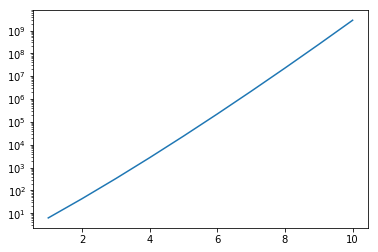

In [73]:
plt.semilogy(n,moments)

In [74]:
2/np.sqrt(2)

1.414213562373095

In [75]:
(np.pi/2)**3

3.875784585037477